# Logika rozmyta - oczyszczacz powietrza

Oczyszczacz powietrza to urządzanie filtrujące powietrze.

Autorzy:

- Adam Jurkiewicz
- Sylwester Kąkol

## Przygotowanie środowiska

```
$ virtualenv venv
$ source venv/bin/activate
$ pip install simpful
```

## Wejścia

| Czynnik           | Rodzaj  |
| ----------------- | ------- |
| Wilgotność				| Czujnik |
| ppm (PM2,5)				| Czujnik |
| ppm (PM10)				| Czujnik |

## Wyjścia:

| Czynnik                   | Rodzaj    |
| ------------------------- | --------- |
| Obroty wiatraka (RPM)		  | Wiatrak   |

## Reguły

- Jeśli PM2.5 = 1-20 μg/m3, lub PM10 = 1-60 μg/m3, to RPM = niskie
- Jeśli PM2.5 = 21-35 μg/m3, lub PM10 = 61-100 μg/m3 i/lub wilgotność = niska lub wysoka, to RPM = średnie
- Jeśli PM2.5 = 36-55 μg/m3, lub PM10 = 101-200 μg/m3, to RPM = wysokie
- Jeśli PM2.5 = 56-100 μg/m3, lub PM10 = 201-250 μg/m3 i/lub wilgotność = niska lub wysoka, to RPM = wysokie

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.8.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

{'RPM': 472.2222222222216}


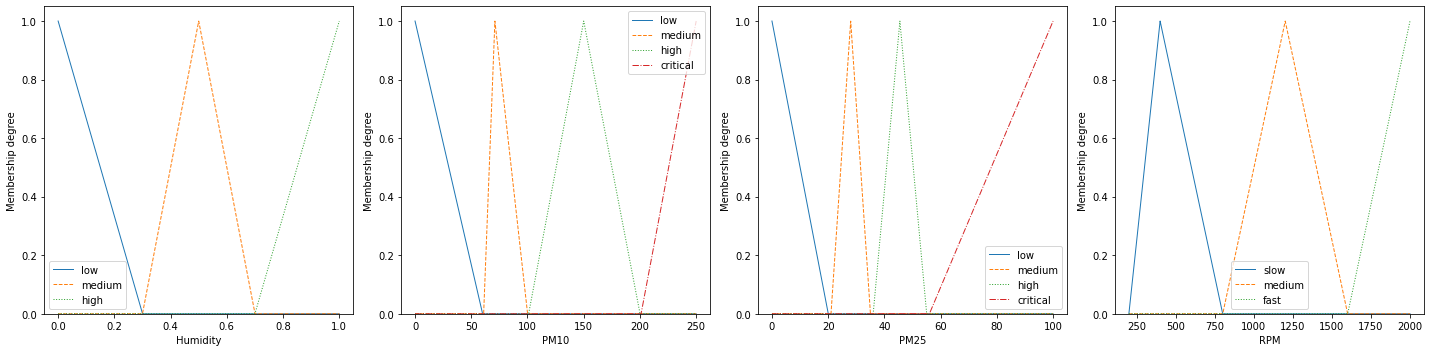

In [ ]:
!pip install simpful
from simpful import *

"""
Create a fuzzy system object
""" 
FS = FuzzySystem()

"""
Define fuzzy sets and linguistic variables
"""
H_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=0.3), term="low")
H_2 = FuzzySet(function=Triangular_MF(a=0.3, b=0.5, c=0.7), term="medium")
H_3 = FuzzySet(function=Triangular_MF(a=0.7, b=1, c=1), term="high")
FS.add_linguistic_variable("Humidity", LinguisticVariable([H_1, H_2, H_3], concept="Humidity", universe_of_discourse=[0, 1]))

P10_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=60), term="low")
P10_2 = FuzzySet(function=Triangular_MF(a=61, b=71, c=100), term="medium")
P10_3 = FuzzySet(function=Triangular_MF(a=101, b=150, c=200), term="high")
P10_4 = FuzzySet(function=Triangular_MF(a=201, b=250, c=250), term="critical")
FS.add_linguistic_variable("PM10", LinguisticVariable([P10_1, P10_2, P10_3, P10_4], concept="PM10", universe_of_discourse=[0, 250]))

P25_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=20), term="low")
P25_2 = FuzzySet(function=Triangular_MF(a=21, b=28, c=35), term="medium")
P25_3 = FuzzySet(function=Triangular_MF(a=36, b=45.5, c=55), term="high")
P25_4 = FuzzySet(function=Triangular_MF(a=56, b=100, c=100), term="critical")
FS.add_linguistic_variable("PM25", LinguisticVariable([P25_1, P25_2, P25_3, P25_4], concept="PM25", universe_of_discourse=[0, 100]))

"""
Define output fuzzy sets and linguistic variable
"""
rpm_low = FuzzySet(function=Triangular_MF(a=200, b=400, c=800), term="slow")
rpm_med = FuzzySet(function=Triangular_MF(a=801, b=1201, c=1600), term="medium")
rpm_hig = FuzzySet(function=Triangular_MF(a=1601, b=2000, c=2000), term="fast")
FS.add_linguistic_variable("RPM", LinguisticVariable([rpm_low, rpm_med, rpm_hig], universe_of_discourse=[200, 2000]))

"""
Define fuzzy rules
"""
rule_1 = "IF (PM25 IS critical) OR (PM10 IS critical) AND (Humidity IS low) OR (Humidity IS high) THEN (RPM IS fast)"
rule_2 = "IF (PM25 IS high) OR (PM10 IS high) THEN (RPM IS fast)"
rule_3 = "IF (PM25 IS medium) OR (PM10 IS medium) AND ((Humidity IS low) OR (Humidity IS high)) THEN (RPM IS medium)"
rule_4 = "IF (PM25 IS low) OR (PM10 IS low) THEN (RPM IS slow)"
FS.add_rules([rule_1, rule_2, rule_3, rule_4])

"""
Set antecedents values
"""
FS.set_variable("PM25", 10)
FS.set_variable("PM10", 20)
FS.set_variable("Humidity", 0.8)

FS.produce_figure(outputfile='lvs.pdf')

"""
Perform Mamdani inference and print output
"""
print(FS.Mamdani_inference(["RPM"]))